# Pymaceuticals Inc.
---

### Analysis

Observation 1: Ramicane and Capomulin emerge as the most potent drugs for suppressing tumor growth, displaying the lowest mean and median tumor volumes among all medications. Additionally, the variance in tumor volume across different sizes indicates consistently smaller tumors in the entire study group, with minimal instances of inadequate tumor inhibition for these two drugs. Boxplots of final tumor volumes align with these summary statistics, suggesting that while the tumor inhibition potential of Ramicane and Capomulin may not significantly differ from each other, it appears significantly stronger than both Infubinol and Ceftamin. Notably, there are no outliers for most drugs of interest, except for Infubinol.

Observation 2: Mouse weight exhibits a strong positive correlation with average tumor volume for the drug Capomulin. In the context of these tumors, higher weight or obesity may lead to less effective inhibition of tumor growth by Capomulin. Further analysis is recommended to explore potential correlation sources, such as the relationship between mouse weight and tumor volume, metabolic differences between heavy and light mice influencing tumor growth, or the impact of the drug dosage-weight interaction on tumor inhibition. 

Observation 3: Tumor inhibition patterns for Capomulin indicate that tumors grow for approximately 20 days before stabilizing and then undergoing a decline. In at least one case, a tumor even shrank to a volume smaller than its initial size at the start of the drug treatment. While it is crucial to verify the general applicability of this pattern, it provides valuable insights into expected tumor response, guiding adjustments and optimization of treatment strategies for individuals.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice.
mouse_count = combined_data['Mouse ID'].nunique()
mouse_count

249

In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
ID_duplicates_all_data = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
ID_duplicates_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
main_mouse_study_filter = combined_data['Mouse ID'].isin(duplicate_mice)
clean_df = combined_data[~main_mouse_study_filter]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [49]:
# Checking the number of mice in the clean DataFrame.
mouse_count_dropped_dupes = clean_df['Mouse ID'].nunique()
mouse_count_dropped_dupes

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_SD = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_volume_stats_drug_cols = ['Mean Tumor Vol.', 'Median Tumor Vol.', 'Tumor Vol. Variance', 'Tumor Vol. SD', 'Tumor Vol. SEM']
tumor_volume_stats_drug = pd.concat([tumor_volume_mean, tumor_volume_median, tumor_volume_variance, tumor_volume_SD, tumor_volume_SEM], keys=tumor_volume_stats_drug_cols, axis=1)
tumor_volume_stats_drug

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. SD,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_stats_drug_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(MeanTumorVol_mm3='mean', MedianTumorVol_mm3='median', TumorVolVariance='var', TumorVolSD_mm3='std', TumorVolSEM='sem')
tumor_volume_stats_drug_agg

,MeanTumorVol_mm3,MedianTumorVol_mm3,TumorVolVariance,TumorVolSD_mm3,TumorVolSEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

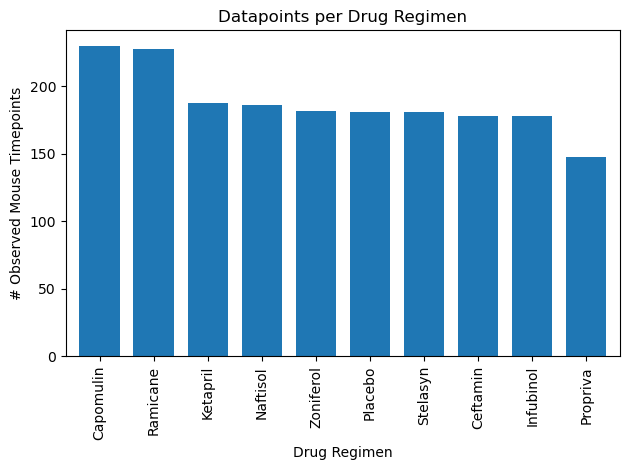

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#group the dataframe by drug regimen and count the timepoints taken in each
bar_chart_timepoints = clean_df.groupby('Drug Regimen')['Timepoint'].count().reset_index()

#sort the grouped data in decending order
bar_chart_timepoints = bar_chart_timepoints.sort_values(by='Timepoint',ascending=False)

#create a bar chart using sorted data and label
bar_chart_plot = bar_chart_timepoints.plot(kind='bar', x='Drug Regimen', y='Timepoint', legend=False, width=0.75)
bar_chart_plot.set_xlabel('Drug Regimen')
bar_chart_plot.set_ylabel('# Observed Mouse Timepoints')
bar_chart_plot.set_title('Datapoints per Drug Regimen')
plt.tight_layout()
plt.show() 

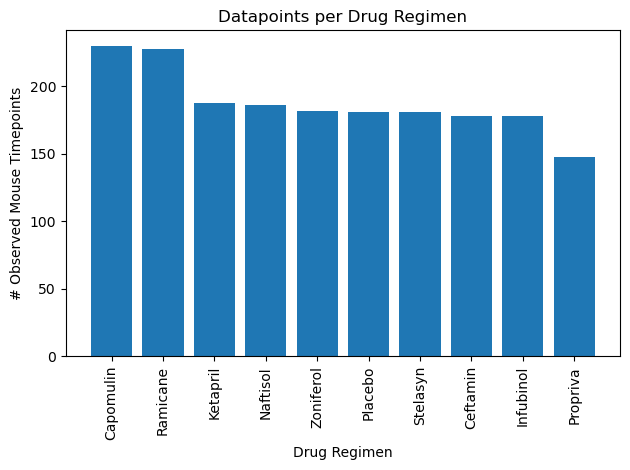

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_chart_timepoints['Drug Regimen'], bar_chart_timepoints['Timepoint'])

#print out the labeled and formatted bar chart
plt.xlabel('Drug Regimen')
plt.ylabel('# Observed Mouse Timepoints')
plt.title('Datapoints per Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout() # for visual pleasure
plt.show()


In [54]:
# Created a new dataframe with unique mice and their gender
mouse_gender_list = clean_df.filter(["Mouse ID", "Sex"], axis=1)
mouse_gender_list = mouse_gender_list.drop_duplicates("Mouse ID", keep='first')
mouse_gender_list = mouse_gender_list.set_index("Mouse ID")
mouse_gender_list

,Sex
Mouse ID,
b128,Female
f932,Male
g107,Female
a457,Female
c819,Male
...,...
t565,Female
i557,Female
m957,Female


In [55]:
# Gender breakdown of the mice in the cleaned sample
mice_gender_count = mouse_gender_list["Sex"].value_counts()
mice_gender_count

Sex
Male      125
Female    123
Name: count, dtype: int64

Text(0.5, 1.0, 'Mouse Male:Female Ratio')

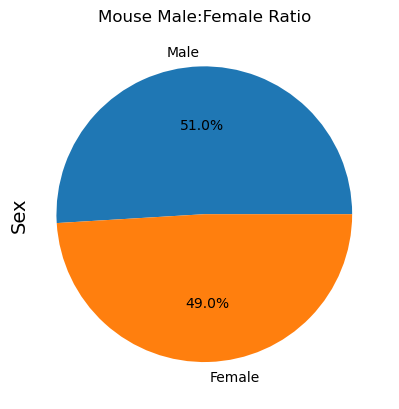

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_sex_counts = clean_df.groupby('Sex').size()
pie_chart_sex_counts = pie_chart_sex_counts.sort_values(ascending=False)
pie_chart_final = pie_chart_sex_counts.plot(kind='pie', autopct='%1.1f%%')
pie_chart_final.annotate('Sex', xy=(-1.25, 0), va='center', ha='center', rotation='vertical', size=14)
pie_chart_final.set_aspect('equal')
pie_chart_final.set_title ('Mouse Male:Female Ratio')

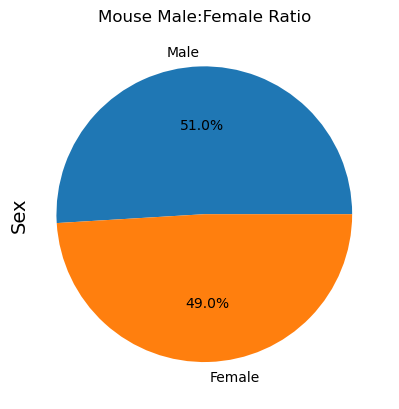

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart_sex_counts, labels=['Male','Female'], autopct='%1.1f%%')
plt.text(-1.25, 0, 'Sex', va='center', ha='center', rotation='vertical', size=14)
plt.title('Mouse Male:Female Ratio')
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

In [59]:
#campulin
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [60]:
#ramicane
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [61]:
#infubinol
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [62]:
#ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [63]:
drug_treatments_interest = ['Capomulin','Ramicane','Infubinol','Ceftamin'] 

#create dataframe that groups our data by Mouse ID and filters our main dataframe to store the index value of the highest (last) timepoint for each Mouse ID
highest_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].idxmax()

#create an empty list to store the last timepoint tumor volume value that pass our drug treatment filtering critera for each Mouse ID
tumor_vol_at_highest_timepoint = []

#loop through all of the filtered index locations to extract the Mouse ID and the Final Tumor Volume ONLY IF that mouse was given a drug of interest
for idx in highest_timepoints:
    
    #extract the 'ID' and 'Tumor Volume' and 'Drug Regimen' values at each index location with the highest timepoint
    unique_mouse_id = clean_df.loc[idx, 'Mouse ID']
    final_tumor_volume = clean_df.loc[idx, 'Tumor Volume (mm3)']
    drug_treatment = clean_df.loc[idx, 'Drug Regimen']
    
    #check to see if 'Drug Regimen' matches any of the drugs of interest
    if drug_treatment in drug_treatments_interest:
        
        #if 'Drug Regimen' matches one of our drugs on interest, store the data of interest at that specific index location in the list
        tumor_vol_at_highest_timepoint.append({
            'Mouse ID': unique_mouse_id,
            'Final Tumor Volume (mm3)': final_tumor_volume,
        })
            
#create dataframe of every unique Mouse ID and their Final Tumor Volumes for our 4 drugs of interest from the list created in the for loop       
final_tumor_vols_df = pd.DataFrame(tumor_vol_at_highest_timepoint)

#merge this dataframe with the original metadata dataframe to get a new dataframe that has our data of interest (final tumor vol.) only for our drugs of interest for each mouse in that drug treatment
four_drug_mouse_metadata_with_last_tumor_vol_df = mouse_metadata.merge(final_tumor_vols_df, on='Mouse ID')

In [64]:
#define a dictionary to store the outlier potential outlier information
outliers_by_drug = {}

#loop through the data to calculate the IQR for every drug treatment of interest
for drug in four_drug_mouse_metadata_with_last_tumor_vol_df['Drug Regimen']:
    drug_data = four_drug_mouse_metadata_with_last_tumor_vol_df[four_drug_mouse_metadata_with_last_tumor_vol_df['Drug Regimen'] == drug]
    q1 = drug_data['Final Tumor Volume (mm3)'].quantile(0.25)
    q3 = drug_data['Final Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    
    #calculate the lower and upper bounds for potential outliers from our calculated interquartile range
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    #identify potential outliers (indiviudual mice) based on their final tumor volume for the current drug
    potential_outliers = drug_data[(drug_data['Final Tumor Volume (mm3)'] < lower_bound) | (drug_data['Final Tumor Volume (mm3)'] > upper_bound)]
    
    #store potential outlier information in the dictionary and move on to next drug
    outliers_by_drug[drug] = potential_outliers[['Mouse ID', 'Final Tumor Volume (mm3)']]

#print out the potential outlier info for each drug and format for visual pleasure
for drug, potential_outliers in outliers_by_drug.items():
    if not potential_outliers.empty:
        for index, row in potential_outliers.iterrows():
            print()
            print(f"{drug}'s potential outliers Mouse ID: {row['Mouse ID']}, Tumor Volume: {row['Final Tumor Volume (mm3)']}")
    else:
        print()
        print(f"No potential outliers found for {drug}.")


No potential outliers found for Ramicane.

No potential outliers found for Capomulin.

Infubinol's potential outliers Mouse ID: c326, Tumor Volume: 36.3213458

No potential outliers found for Ceftamin.


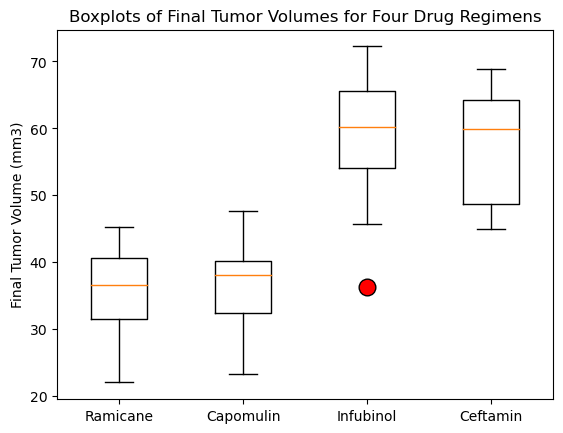

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([four_drug_mouse_metadata_with_last_tumor_vol_df[four_drug_mouse_metadata_with_last_tumor_vol_df['Drug Regimen'] == drug]['Final Tumor Volume (mm3)'] for drug in four_drug_mouse_metadata_with_last_tumor_vol_df['Drug Regimen'].unique()], labels=four_drug_mouse_metadata_with_last_tumor_vol_df['Drug Regimen'].unique(), showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Boxplots of Final Tumor Volumes for Four Drug Regimens')
plt.show()

## Line and Scatter Plots

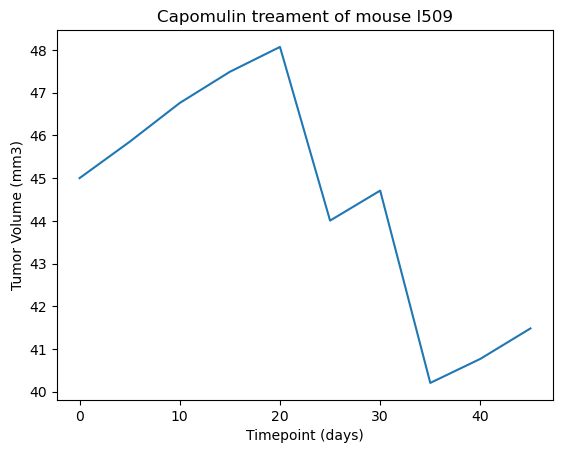

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#define our variables for Mouse ID and drug regimen of interest
target_mouse_ID = 'l509'
target_treatment = 'Capomulin'

#filter our main dataframe for that mouse and drug treatment
filtered_line_chart_data_treatment = clean_df[(clean_df['Mouse ID'] == target_mouse_ID) & (clean_df['Drug Regimen'] == target_treatment)]

#define the x and y variables for the line chart
x = filtered_line_chart_data_treatment['Timepoint']
y = filtered_line_chart_data_treatment['Tumor Volume (mm3)']

#print our desired x and y variables on a labeled chart
plt.plot(x,y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'{target_treatment} treament of mouse {target_mouse_ID}')
plt.show()

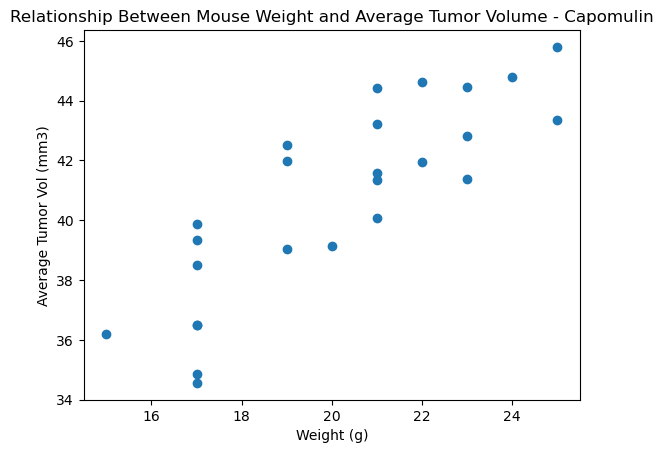

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#filter data so that only rows where the drug treatment are Capomulin are "visible"
filtered_drug_by_ave_tumor_vols = clean_df[clean_df['Drug Regimen'] == target_treatment]

#group the filtered data by Mouse ID and calculate the mean for Tumor Volume for every mouse
grouped_filtered_drug_by_ave_tumor_vols = filtered_drug_by_ave_tumor_vols.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

#merge the average tumor volume dataframe with the Capomulin filtered data so that mouse weight and average tumor volume and mouse ID are all in a single dataframe but only for Capomulin treated mice
merged_df_weight_by_tumor_vol = pd.merge(filtered_drug_by_ave_tumor_vols[['Mouse ID', 'Weight (g)']].drop_duplicates(), grouped_filtered_drug_by_ave_tumor_vols, on='Mouse ID')

#rename the column header for the Average Tumor Volume for clarity
merged_df_weight_by_tumor_vol = merged_df_weight_by_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

#print the scatter plot with desired formatting
plt.scatter(merged_df_weight_by_tumor_vol['Weight (g)'], merged_df_weight_by_tumor_vol['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Vol (mm3)')
plt.title('Relationship Between Mouse Weight and Average Tumor Volume - Capomulin')
plt.show()      

## Correlation and Regression


The Pearson correlation between mouse weight and the average tumor volume is 0.84 with a P-value of 0.00000



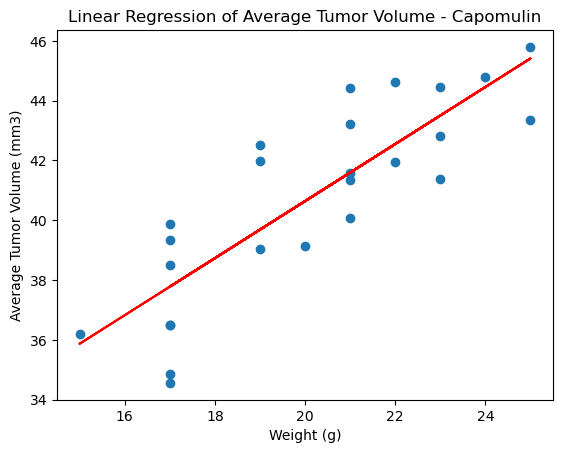

Linear equation: y = 0.95x + 21.55
R-squared: 0.71
P-value: 0.00000


In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#calculate and print the Pearson correlation for data of interest (weight (g) x average tumor volume (mm3))
pearson_corr, pearson_p_value = st.pearsonr(merged_df_weight_by_tumor_vol['Weight (g)'], merged_df_weight_by_tumor_vol['Average Tumor Volume (mm3)'])
formatted_pearson_corr = '{:.2f}'.format(round(pearson_corr,2)) #round to two decimal places for visual pleasure
formatted_pearson_p_value = '{:.5f}'.format(round(pearson_p_value,5)) 
print()
print(f'The Pearson correlation between mouse weight and the average tumor volume is {formatted_pearson_corr} with a P-value of {formatted_pearson_p_value}')

#define independent and dependent variables for data of interest for linear regression calculation
X = merged_df_weight_by_tumor_vol['Weight (g)']
Y = merged_df_weight_by_tumor_vol['Average Tumor Volume (mm3)']

#calculate the statistics of the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X, Y)
regression_line = slope * X + intercept  #define our regression line equation using the results from our linear regression calculations

#create scatter plot of the data itself
plt.scatter(X, Y)

#add the calculated regression line to the scatter plot and print it out with the regression line visible
print()
plt.plot(X, regression_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression of Average Tumor Volume - Capomulin')
plt.show()
formatted_rvalue = '{:.2f}'.format(round(rvalue ** 2, 2))
formatted_pvalue = '{:.5f}'.format(round(pvalue, 5))
formatted_slope = '{:.2f}'.format(round(slope, 2))
formatted_intercept = '{:.2f}'.format(round(intercept, 2))
print(f'Linear equation: y = {formatted_slope}x + {formatted_intercept}')
print(f'R-squared: {formatted_rvalue}')
print(f'P-value: {formatted_pvalue}')